In [1]:
# Pytorch Workflow

In [2]:
import torch
from torch import nn # nn contains torch's neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (preparing and loading)

ML is a game of two parts:
1. Get data into a numerical representation
2. Biuld a model to learn patterns in that numeral data

# First Model
Using linear regression with known **paremters** to train a basic model



In [3]:
## Create *known* parameters
weight = 0.7
bias = 0.3

## Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
## Splitting data into training and test sets (split)
### Three Datasets
# 1. training set
# 2. validation set
# 3. test set

### Create train/split
train_split = int(0.8 * len(X))
X_train, y_train, = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# training features
print(len(X_train))
# training labels
print(len(y_train))
# testing features
print(len(X_test))
# testing labels
print(len(y_test))

40
40
10
10


In [16]:
## Visualize Data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training and test data and compares predictions
  """

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot training data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # test for predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show legend
  plt.legend(prop={"size": 14});

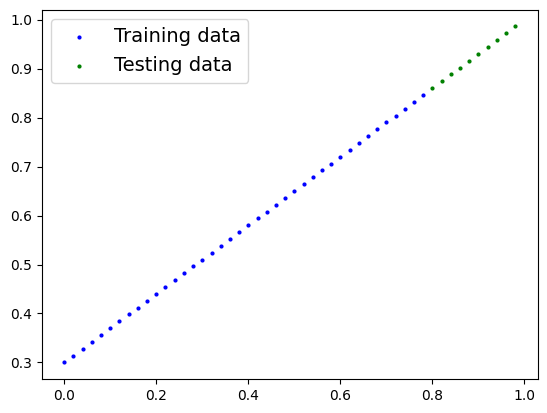

In [6]:
plot_predictions();

In [7]:
## Build Linear Regression Model Class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # can be updated with grandient decent
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.rand(1,# start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True,
                                        dtype=float))

  # forward method to define the computation of the model
  # this method always gets called when an instance of the class is called
  # and will override the default method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias




In [8]:
# Inspect the model

# Create random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [9]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1236], dtype=torch.float64))])

In [10]:
weight, bias


(0.7, 0.3)

In [11]:
# predict y_test based on X_test with current data
with torch.inference_mode():

  # pass the model test data and save the output
  y_preds = model_0(X_test)

# print the output
y_preds

tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64)

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

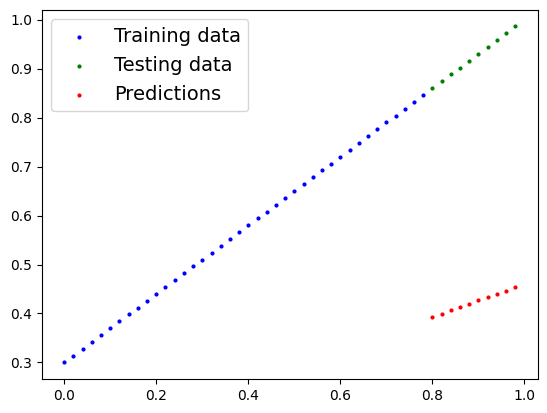

In [17]:
# plot the predictions from the untrained model
plot_predictions(predictions=y_preds)

## Train the model

Things needed:
* **Loss Function** - measure of how wrong the model is, lower is better
* **Optimizer** takes loss into account and adjusts the model's params
* Training loop
* Testing loop

In [25]:
# set up loss function
loss_fn = nn.L1Loss()

# set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate. small value will adjust the param in a small step

### Training loop
0. loop through data
1. forward pass (moove data through the `forward()` functions)
2. Calculate lost (compare forward pass prediction to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the params of the model with respect ot the loss
5. Optimizer step = use the optimizer ot adjust the model's params and try to improve the loss (**gradient descent**)

In [ ]:
# epoch == loop through the data

epochs = 1

# 0. loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optmizer Zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss iwth repsect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop. this will need to be set to zero step three above

  # turns of gradient tracking
  model_0.eval()